In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_hdf("../input/df.train.h5")
df_test = pd.read_hdf("../input/df.test.h5")

df = pd.concat([df_train, df_test])

print(df_train.shape)
print(df.shape)

df.sample(10)

(80129, 10)
(160258, 10)


,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params
77736,77736,"Cena Brutto, Do negocjacji",11 900,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Chlewiska, szydłowiecki, Mazowieckie","[Osobowe, Opel, Astra, Opel Astra H (2004-2014)]","{'Liczba miejsc': '5', 'Kraj pochodzenia': 'Fr..."
74629,74629,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Kraków, Małopolskie, Bronowice","[Osobowe, Fiat, Doblo, Fiat Doblo I (2000-2010)]","{'Pojemność skokowa': '1 400 cm3', 'Model poja..."
121266,121266,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Radio fabryc...",W&R,Dealer,Wysogotowska 3 /wjazd ul.Poznańska 14-stacja S...,"[Osobowe, Chevrolet, Spark]","{'Kolor': 'Inny kolor', 'Model pojazdu': 'Spar..."
134876,134876,"Cena Brutto, Faktura VAT",109 900,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",PLICHTA Sp. z o.o. Sp. komandytowa,Dealer,"Morska 318 - 81-006 Gdynia, Cisowa (Polska)","[Osobowe, Volkswagen, Touran, Volkswagen Toura...","{'Pojemność skokowa': '1 400 cm3', 'Model poja..."
24164,24164,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",AUTO SALON -ATTA- NAJSTARSZY- NAJPEWNIEJSZY -N...,Dealer,"Polna 1A - 64-920 Piła, pilski, Wielkopolskie ...","[Osobowe, Audi, A6, Audi A6 C6 (2004-2011)]","{'Pojemność skokowa': '2 000 cm3', 'Model poja..."
103653,103653,"Cena Brutto, Do negocjacji",10 990,PLN,"[ABS, Elektrycznie ustawiane lusterka, Poduszk...",Auto Boss Komis Samochodowy Police,Dealer,Tanowska 8 ( NA TERENIE FIRMY TRANS-NET ) - 72...,"[Osobowe, Mercedes-Benz, Klasa E, E 250, Merce...","{'Liczba miejsc': '5', 'Kraj pochodzenia': 'Ni..."
30923,30923,"Cena Brutto, Faktura VAT",318 113,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Audi Centrum Gdańsk,Dealer,"Lubowidzka 44 - 80-174 Gdańsk, Kokoszki (Polska)","[Osobowe, Audi, TT RS]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '4', ..."
118572,118572,Cena Brutto,35 900,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Gdańsk, Pomorskie, Wrzeszcz","[Osobowe, Mini, Cooper]","{'Kolor': 'Czarny', 'Model pojazdu': 'Cooper',..."
25025,25025,"Cena Brutto, Do negocjacji",9 999,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Karol,Dealer,"Mrozy - 05-320 Mrozy, miński, Mazowieckie (Pol...","[Osobowe, BMW, Seria 3, 330, BMW Seria 3 E46 (...","{'Liczba miejsc': '5', 'Pojemność skokowa': '3..."
97778,97778,NaN,NaN,NaN,[ABS],Autoryzowany salon Nissan Suzuki Mitsubishi JA...,Dealer,"Sobieskiego 10 - 41-300 Dąbrowa Górnicza, Śląs...","[Osobowe, Suzuki, Vitara, Suzuki Vitara II (20...","{'Pojemność skokowa': '1 586 cm3', 'Model poja..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160258 entries, 7 to 160254
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              160258 non-null  int64 
 1   price_details   80129 non-null   object
 2   price_value     80129 non-null   object
 3   price_currency  80129 non-null   object
 4   features        160258 non-null  object
 5   seller_name     97099 non-null   object
 6   seller_type     160258 non-null  object
 7   seller_address  160258 non-null  object
 8   breadcrumb      160258 non-null  object
 9   offer_params    160258 non-null  object
dtypes: int64(1), object(9)
memory usage: 13.4+ MB


price_value is our target, except it there are two other columns that correspond to price.

In [4]:
df['price_details'].value_counts()

Cena Brutto, Do negocjacji                 37102
Cena Brutto                                22023
Cena Brutto, Faktura VAT                   10380
Cena Brutto, Do negocjacji, Faktura VAT     5759
Cena Netto, Faktura VAT                     2166
Cena Netto, Do negocjacji, Faktura VAT      1693
Cena Netto, Do negocjacji                    527
Cena Netto                                   479
Name: price_details, dtype: int64

In [5]:
df['price_currency'].value_counts()

PLN    80129
Name: price_currency, dtype: int64

We don't have informations about price details in test set. Anyway in train there are two important values : gross (brutto) and net (netto). I think than that price should be recalculated into one standard.

Price currency is only in PLN, so it is good.

For sure we need to change price_value type from object to float.

In [3]:
df['price_value'] = df['price_value'].str.replace(' ', '').str.replace(',', '.').astype('float')

In [7]:
df['price_value'].describe()

count    8.012900e+04
mean     1.248471e+08
std      3.532687e+10
min      5.000000e+02
25%      1.390000e+04
50%      2.560000e+04
75%      5.290000e+04
max      1.000000e+13
Name: price_value, dtype: float64

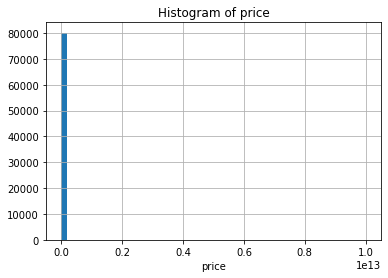

In [8]:
df['price_value'].hist(bins=50);
plt.title('Histogram of price');
plt.xlabel('price');

There are some suspicious outliers.

In [9]:
df[df['price_value'] > 2000000]

,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params
32809,32809,"Cena Brutto, Do negocjacji, Faktura VAT",2.193400e+06,PLN,"[ABS, Alarm, Elektrycznie ustawiane lusterka, ...",Salon Bentley - Lamborghini Warszawa,Dealer,"Połczyńska 120B - 00-347 Warszawa, Mazowieckie...","[Osobowe, Lamborghini, Aventador]","{'Kolor': 'Żółty', 'Model pojazdu': 'Aventador..."
106447,106447,Cena Brutto,1.000000e+13,PLN,"[ABS, Elektrycznie ustawiane lusterka, Poduszk...",None,Osoba prywatna,"Lubań, lubański, Dolnośląskie","[Osobowe, Honda, Jazz, Honda Jazz IV (2015-)]","{'Pojemność skokowa': '9 999 cm3', 'Model poja..."
117221,117221,"Cena Brutto, Do negocjacji",2.545412e+06,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Elbląg, Warmińsko-mazurskie","[Osobowe, Ford, Galaxy, Ford Galaxy Mk2 (2006-...","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '7', ..."
131407,131407,"Cena Brutto, Faktura VAT",2.178000e+06,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",FACTORY AUTO,Dealer,"Al. Witosa 31 lok. 6a - 00-710 Warszawa, Mokot...","[Osobowe, Ferrari, Inny]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '2', ..."
153647,153647,"Cena Netto, Faktura VAT",2.050000e+06,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Nivette Luxury Cars,Dealer,"Sułkowicka 2 przez 4 - 00-746 Warszawa, Mokotó...","[Osobowe, Lamborghini, Aventador]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '2', ..."


It's very unlikely that honda jazz cost that much. we can delete that row from our set.

In [4]:
df.drop([106447], inplace=True)

In [11]:
df['price_value'].describe()

count    8.012800e+04
mean     4.834785e+04
std      7.313622e+04
min      5.000000e+02
25%      1.390000e+04
50%      2.560000e+04
75%      5.290000e+04
max      2.545412e+06
Name: price_value, dtype: float64

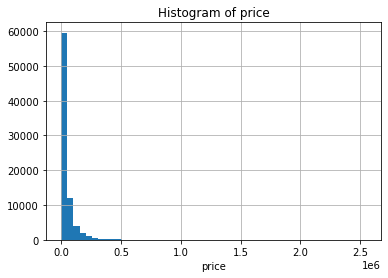

In [12]:
df['price_value'].hist(bins=50);
plt.title('Histogram of price');
plt.xlabel('price');

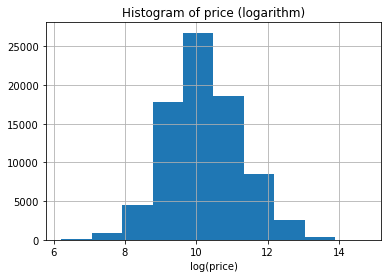

In [13]:
np.log(df['price_value']).hist();
plt.title('Histogram of price (logarithm)');
plt.xlabel('log(price)');

Since price is skewed it will be good idea to use logarithm of price_value to train model 

In our data are 3 columns as list or dictionary from which we can extract more features.

In [14]:
df['features'].sample(10)

55943     [ABS, Elektryczne szyby przednie, Poduszka pow...
93493     [ABS, Elektryczne szyby przednie, Alarm, Asyst...
23326     [ABS, Elektryczne szyby przednie, Poduszka pow...
110260    [ABS, Elektryczne szyby przednie, Radio fabryc...
88295     [ABS, Elektryczne szyby przednie, Poduszka pow...
41532     [ABS, Elektryczne szyby przednie, Poduszka pow...
122117    [ABS, Elektryczne szyby przednie, Poduszka pow...
26375     [ABS, Elektryczne szyby przednie, Poduszka pow...
118489    [ABS, Elektrycznie ustawiane lusterka, Poduszk...
146483    [ABS, Elektryczne szyby przednie, Poduszka pow...
Name: features, dtype: object

In 'features' column we have information about car equipment. Let's explore it further... 

In [15]:
features_list = df['features'].tolist()
features = []
for x in features_list:
    for y in x:
        if y.lower() not in features:
            features.append(y.lower())

In [16]:
print('there are {} features in features column'.format(len(features)))

there are 70 features in features column


In [17]:
features

['abs',
 'elektrycznie ustawiane lusterka',
 'poduszka powietrzna pasażera',
 'alufelgi',
 'czujnik deszczu',
 'esp (stabilizacja toru jazdy)',
 'isofix',
 'komputer pokładowy',
 'mp3',
 'poduszki boczne przednie',
 'światła do jazdy dziennej',
 'tempomat',
 'system start-stop',
 'centralny zamek',
 'immobilizer',
 'radio fabryczne',
 'asr (kontrola trakcji)',
 'czujnik zmierzchu',
 'gniazdo aux',
 'kamera cofania',
 'kurtyny powietrzne',
 'nawigacja gps',
 'przyciemniane szyby',
 'światła przeciwmgielne',
 'wielofunkcyjna kierownica',
 'światła led',
 'elektryczne szyby przednie',
 'poduszka powietrzna kierowcy',
 'wspomaganie kierownicy',
 'bluetooth',
 'czujniki parkowania tylne',
 'gniazdo usb',
 'klimatyzacja automatyczna',
 'łopatki zmiany biegów',
 'podgrzewane lusterka boczne',
 'relingi dachowe',
 'tapicerka welurowa',
 'ogranicznik prędkości',
 'alarm',
 'cd',
 'elektryczne szyby tylne',
 'elektrochromatyczne lusterka boczne',
 'poduszki boczne tylne',
 'elektrochromatyczne l

In [18]:
for feature in features:
    df[feature] = df['features'].map(lambda x: 1 if feature in [i.lower() for i in x] else 0)

In [19]:
df[features].sum().sort_values()

tuner tv                          2308
hud (wyświetlacz przezierny)      3900
ogrzewanie postojowe              5176
podgrzewane tylne siedzenia       5387
klimatyzacja czterostrefowa       5726
                                 ...  
poduszka powietrzna kierowcy    143263
elektryczne szyby przednie      143543
wspomaganie kierownicy          143939
centralny zamek                 146714
abs                             147377
Length: 70, dtype: int64

In [20]:
d = {'feature' : [], 'is' : [], 'median' : []}

for x in features:
    g = df.groupby(x)['price_value'].median()
    for i in range(2):
        d['feature'].append(x)
        d['is'].append(g.index[i])
        d['median'].append(g.values[i])

df_features = pd.DataFrame(d)


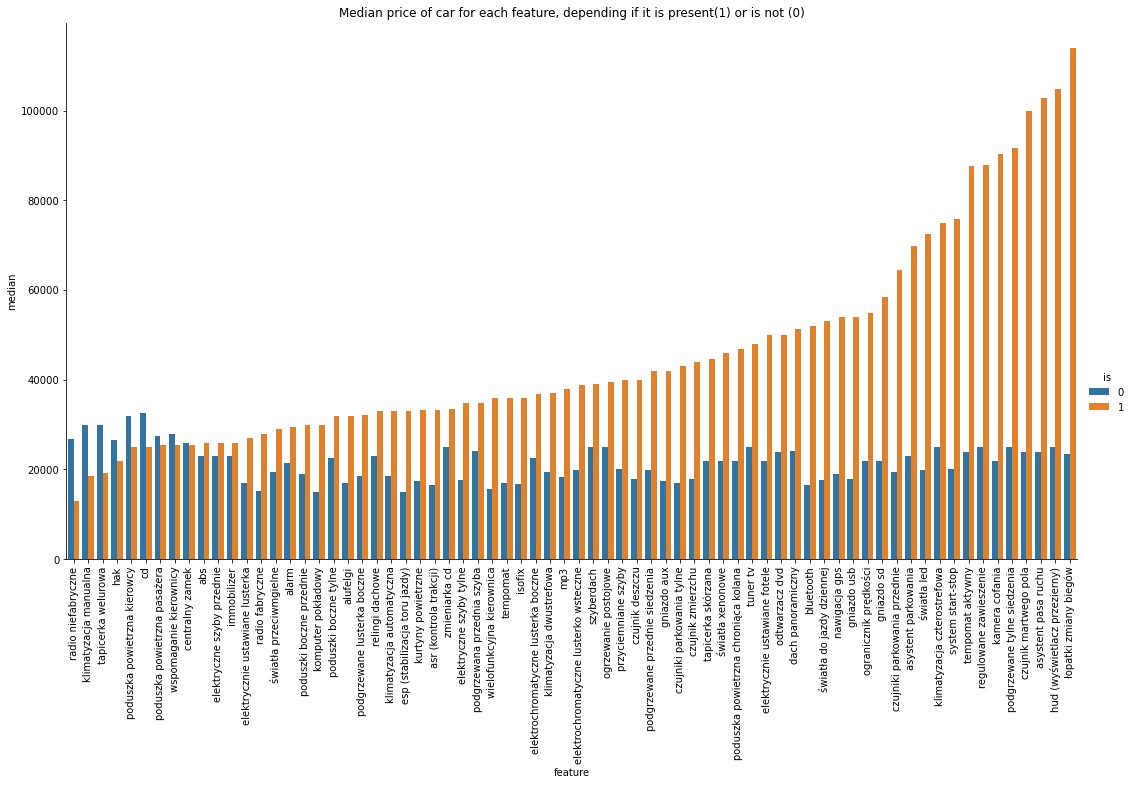

In [21]:
order = df_features[df_features['is']==1].sort_values(['median'])
p = sns.catplot(x='feature', y='median', data=df_features, hue='is', kind='bar', order = order['feature'], height=8, aspect=15/8);
plt.xticks(rotation=90);
plt.title('Median price of car for each feature, depending if it is present(1) or is not (0)');

In [22]:
order['feature'].tail(14) #14 features with highest median price

117                      gniazdo sd
113    czujniki parkowania przednie
119             asystent parkowania
51                      światła led
135     klimatyzacja czterostrefowa
25                system start-stop
127                tempomat aktywny
125          regulowane zawieszenie
39                   kamera cofania
109     podgrzewane tylne siedzenia
131           czujnik martwego pola
129             asystent pasa ruchu
133    hud (wyświetlacz przezierny)
67            łopatki zmiany biegów
Name: feature, dtype: object

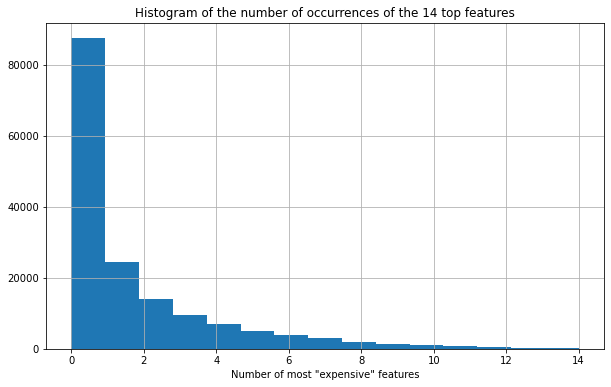

In [24]:
ff = list(order['feature'].tail(14))
df['nr_expensive_feats'] = df[ff].apply(lambda x: x.sum(), axis=1)
df['nr_expensive_feats'].hist(bins=15, figsize=(10,6));
plt.title('Histogram of the number of occurrences of the 14 top features');
plt.xlabel('Number of most "expensive" features');

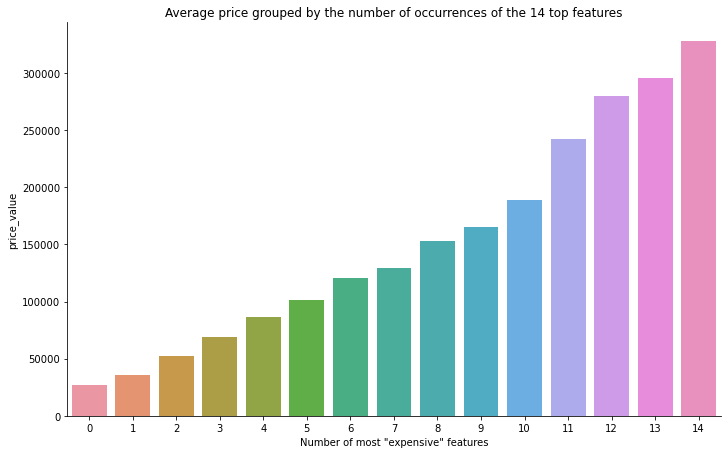

In [25]:
g = df.groupby('nr_expensive_feats')['price_value'].mean().reset_index()
sns.catplot(x='nr_expensive_feats', y='price_value', data=g, kind='bar', height=6, aspect=10/6);
plt.title('Average price grouped by the number of occurrences of the 14 top features');
plt.xlabel('Number of most "expensive" features');

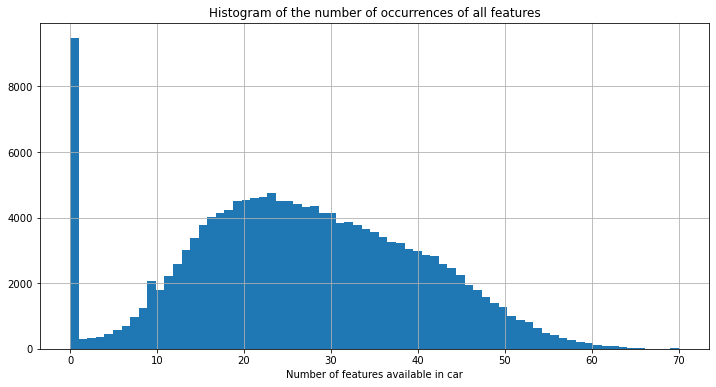

In [26]:
df['nr_of_features'] = df['features'].map(lambda x: len(x))
df['nr_of_features'].hist(bins=71, figsize=(12,6));
plt.title('Histogram of the number of occurrences of all features');
plt.xlabel('Number of features available in car');

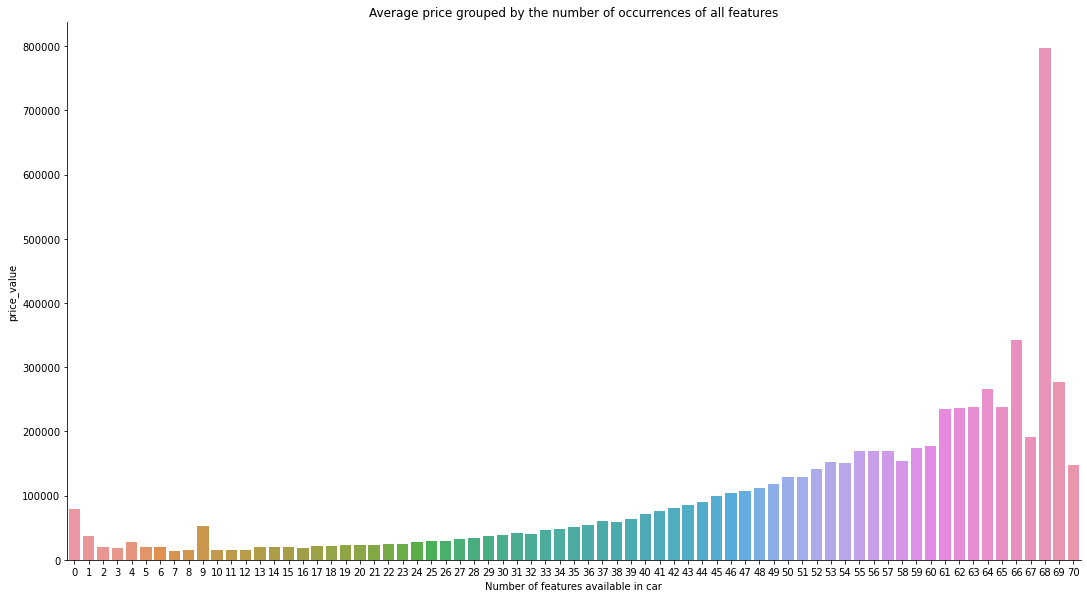

In [27]:
g = df.groupby('nr_of_features')['price_value'].mean().reset_index()
sns.catplot(x='nr_of_features', y='price_value', data=g, kind='bar', height=8, aspect=15/8);
plt.title('Average price grouped by the number of occurrences of all features');
plt.xlabel('Number of features available in car');

In [28]:
df['seller_name'].value_counts() # check if there is more of cars from one seller

AAA AUTO - aż 1000 samochodów w ofercie! do 24 m-cy gwarancji - CarLife! aż 80% pojazdów krajowych!    954
Master1                                                                                                495
AUTO-HANDEL                                                                                            432
Auto Handel                                                                                            302
CARSERWIS                                                                                              290
                                                                                                      ... 
AJR Media Polska                                                                                         1
Go4Money.pl                                                                                              1
USAIMPORT.PL                                                                                             1
Francpol                             

In [29]:
df['seller_type'].value_counts()

Dealer            97099
Osoba prywatna    63158
Name: seller_type, dtype: int64

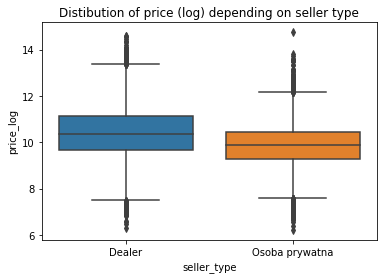

In [5]:
df['price_log'] = np.log(df['price_value']) # this is for better boxplot visualization
sns.boxplot(x='seller_type', y='price_log', data=df);
plt.title('Distibution of price (log) depending on seller type');

In [31]:
# List of counties in Poland
voivodships = ['dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie', 'łódzkie' , 'małopolskie', 'mazowieckie', 
               'wielkopolskie', 'opolskie', 'podkarpackie', 'podlaskie', 'śląskie', 'świętokrzyskie', 
               'warmińsko-mazurskie', 'zachodniopomorskie', 'pomorskie']
def voivodship(x):
    for i in voivodships:
        if i in x.lower():
            return i
    return ''
df['voivodship'] = df['seller_address'].map(voivodship) # extract counties from address column

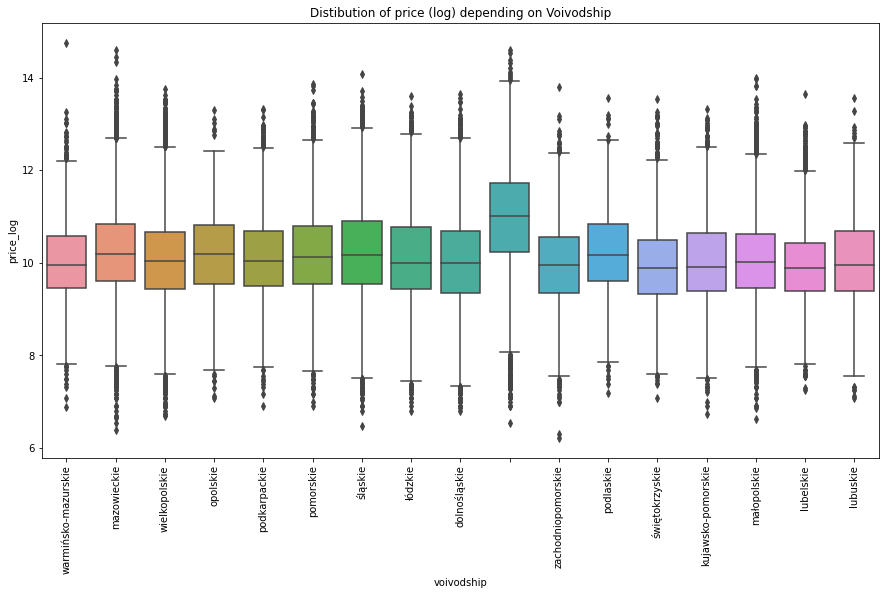

In [32]:

plt.figure(figsize=(15,8))
sns.boxplot(x='voivodship', y='price_log', data=df);
plt.xticks(rotation=90);
plt.title('Distibution of price (log) depending on Voivodship');

In [33]:
df['breadcrumb'].sample(10)

88214     [Osobowe, BMW, Seria 3, 320, BMW Seria 3 E46 (...
30048     [Osobowe, Opel, Meriva, Opel Meriva I (2002-20...
29839     [Osobowe, Porsche, 911, Porsche 911 964 (1989-...
140104    [Osobowe, Nissan, Qashqai, Nissan Qashqai II (...
147204    [Osobowe, Nissan, Qashqai, Nissan Qashqai I (2...
92641            [Osobowe, Mazda, 6, Mazda 6 I (2002-2008)]
12365     [Osobowe, Opel, Vectra, Opel Vectra C (2002-20...
91073      [Osobowe, Citroën, C4, Citroën C4 I (2004-2010)]
19083      [Osobowe, Opel, Astra, Opel Astra J (2009-2015)]
92250               [Osobowe, Audi, A4, Audi A4 B9 (2015-)]
Name: breadcrumb, dtype: object

In [6]:
# there are four informations to extract from 'breadcrumb' column:
df['type'] = df['breadcrumb'].str[0]
df['brand'] = df['breadcrumb'].str[1]
df['model'] = df['breadcrumb'].str[2]
df['version'] = df['breadcrumb'].map(lambda x: x[-1] if len(x)>3 else np.nan)

In [35]:
print('Top 22 most expensive (by median price) brands')
df.groupby('brand')['price_value'].agg(['median', 'count']).sort_values(by='median', ascending=False).head(22)


Top 22 most expensive (by median price) brands


,median,count
brand,,
Lamborghini,999900.0,11
Ferrari,659000.0,20
McLaren,572000.0,1
Maybach,489000.0,1
Bentley,482000.0,21
Tesla,391750.0,16
Aston Martin,352448.5,10
Rolls-Royce,347500.0,6
Maserati,299900.0,38


In [7]:
params = df['offer_params'].apply(pd.Series) # extract info from 'offer_params' column

In [8]:
params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160257 entries, 7 to 160254
Data columns (total 76 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Bezwypadkowy                   100630 non-null  object
 1   Liczba miejsc                  142396 non-null  object
 2   Kraj pochodzenia               109095 non-null  object
 3   Pojemność skokowa              152676 non-null  object
 4   Rodzaj paliwa                  160129 non-null  object
 5   Skrzynia biegów                151596 non-null  object
 6   Możliwość finansowania         53704 non-null   object
 7   Pierwszy właściciel            70911 non-null   object
 8   Oferta od                      160257 non-null  object
 9   Liczba drzwi                   145514 non-null  object
 10  Przebieg                       159723 non-null  object
 11  Moc                            146173 non-null  object
 12  Metalik                        109355 non-nu

There are some parameters in Polish and English. Are they duplicated or may complement? Also type some of them can be change from object to int.

In [9]:
pd.crosstab(params['Nr of seats'].fillna('_NaN'), params['Liczba miejsc'].fillna('_NaN'))

Liczba miejsc,1,2,3,4,5,6,7,8,9,_NaN
Nr of seats,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,5
5,0,0,0,0,0,0,0,0,0,105
7,0,0,0,0,0,0,0,0,0,3
_NaN,4,1723,375,7045,123021,567,8100,504,1057,17748


In [10]:
pd.crosstab(params['Year'].fillna('_NaN'), params['Rok produkcji'].fillna('_NaN'))

Rok produkcji,1929,1930,1931,1932,1933,1936,1937,1941,1942,1944,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,_NaN
Year,,,,,,,,,,,,,,,,,,,,,
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [11]:
pd.crosstab(params['Make'].fillna('_NaN'), params['Marka pojazdu'].fillna('NaN'))

Marka pojazdu,Acura,Aixam,Alfa Romeo,Aro,Asia,Aston Martin,Audi,Austin,Autobianchi,BMW,...,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,Yugo,Zaporożec,Zastava,Škoda,Żuk
Make,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Audi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chrysler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Citroën,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fiat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There is obviously pattern that for missing values for Polish name correspond value in English. 

In [13]:
pairs = [('Marka pojazdu', 'Make'), ('Metalik', 'Metallic'), ('Pojemność skokowa', 'Engine capacity'), ('Wersja', 'Version'),
        ('Bezwypadkowy', 'No accident'), ('Przebieg', 'Mileage'), ('Serwisowany w ASO', 'Service record'),
        ('Liczba drzwi', 'Door count'), ('Rodzaj paliwa', 'Fuel type'), ('Liczba miejsc', 'Nr of seats'),
         ('Skrzynia biegów', 'Gearbox'), ('Napęd', 'Transmission'), ('Moc', 'Engine power'), ('Model pojazdu', 'Model'),
        ('Kolor', 'Color'), ('Kraj pochodzenia', 'Country of origin'), ('Typ', 'Body type'), ('Rok produkcji', 'Year'),
        ('Akryl (niemetalizowany)', 'Acrylic'), ('Możliwość finansowania', 'Financing option'),
         ('Zarejestrowany w Polsce', 'Registered in Poland'), ('Pierwszy właściciel', 'Original owner'),
        ('Pierwsza rejestracja', 'First registration'), ('Perłowy', 'Pearl'), ('Kod Silnika', 'Engine Code'),
        ('Filtr cząstek stałych', 'Particle filter'), ('Leasing', 'Leasing concession'), ('Uszkodzony', 'Damaged'),
        ('Emisja CO2', 'CO2 emissions'), ('Miesięczna rata', 'Monthly payment value')]

for pl, en in pairs:
#     params['{}_new'.format(en)] = params[[pl, en]].apply(lambda x: x[en] if np.isnan(x[pl]) else x[pl], axis=1)
    params['{}_new'.format(en)] = params[pl].combine_first(params[en])
    params.drop(columns=[pl, en], inplace=True)

In [14]:
params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160257 entries, 7 to 160254
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Oferta od                      160257 non-null  object
 1   Stan                           160257 non-null  object
 2   Kategoria                      160257 non-null  object
 3   Faktura VAT                    39791 non-null   object
 4   VAT marża                      54537 non-null   object
 5   VIN                            35680 non-null   object
 6   Liczba pozostałych rat         443 non-null     object
 7   Opłata początkowa              413 non-null     object
 8   Wartość wykupu                 408 non-null     object
 9   Tuning                         872 non-null     object
 10  Kierownica po prawej (Anglik)  1162 non-null    object
 11  Homologacja ciężarowa          1152 non-null    object
 12  VAT discount                   42 non-null  

In [15]:
params = params.fillna(-1) # change NaN values to -1 for easier transformation and ML algorithms
if "Oferta od" not in df:
    df = pd.concat([df, params], axis=1)

In [16]:
pd.crosstab(df['Oferta od'], df['seller_type'])

seller_type,Dealer,Osoba prywatna
Oferta od,,
Firmy,97094,0
Osoby prywatnej,5,63158


columns 'Oferta od' and 'seller_type' are practically duplicated so one of them can be deleted.

In [19]:
pd.crosstab(df['Kategoria'], df['type'])

type,Osobowe
Kategoria,
Osobowe,160257


In [17]:
len(df[df['Make_new']!=df['brand']]) # Make_new and brand are the same if 0

0

In [18]:
len(df[df['Model_new']!=df['model']])

0

Looks like Model_new and model are the same.

So we have 4 columns that are duplicates and can be dropped.

In [40]:
df[df['Monthly payment value_new']!=-1][['price_value', 'Liczba pozostałych rat', 'Opłata początkowa', 'Wartość wykupu', 'Monthly payment value_new']].sample(10)

,price_value,Liczba pozostałych rat,Opłata początkowa,Wartość wykupu,Monthly payment value_new
105745,NaN,37,26 000 PLN,14 100 PLN,"2 244,14 PLN"
148548,NaN,40,1 PLN,36 749 PLN,1 797 PLN
148843,29900.0,-1,-1,-1,400 PLN
127536,NaN,-1,-1,-1,600 PLN
121399,NaN,16,70 000 PLN,"16 228,13 PLN","2 680,49 PLN"
128812,34900.0,-1,-1,-1,600 PLN
69615,169500.0,36,"34 390,24 PLN","1 375,61 PLN","2 957,68 PLN"
31953,NaN,35,"24 963,84 PLN","1 248,19 PLN","2 739,50 PLN"
95092,122900.0,60,9 990 PLN,30 969 PLN,1 229 PLN
123277,46900.0,-1,-1,-1,450 PLN


Here we have some data that are connected with price, there are much more missing values but still . Should we delete it or try to use and see what happen - will this lead to overfitting?

Now let's explore parameters that can be changed from object type to numeric. 

In [19]:
df['Year_new'] = df['Year_new'].astype(int)
df[df['Year_new']!=-1]['Year_new'].describe()

count    160257.000000
mean       2009.050575
std           6.023036
min        1929.000000
25%        2005.000000
50%        2009.000000
75%        2014.000000
max        2018.000000
Name: Year_new, dtype: float64

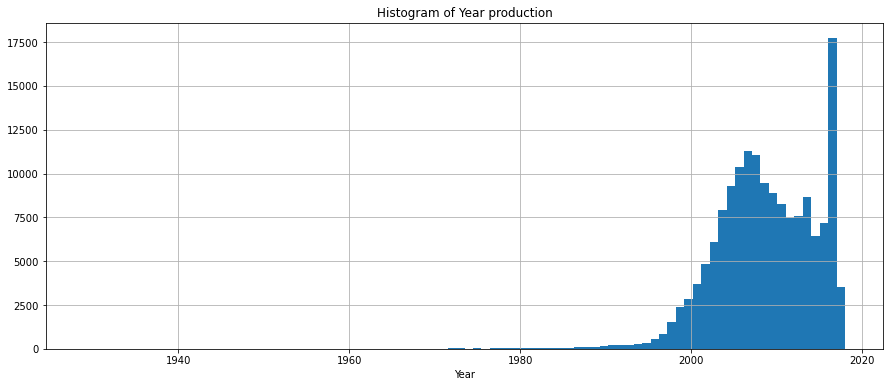

In [20]:
df[df['Year_new']!=-1]['Year_new'].hist(bins=(2019-1929), figsize=(15,6));
plt.title('Histogram of Year production');
plt.xlabel('Year');

In [21]:
df['Year_new'].value_counts(normalize=True).head(15)

2017    0.110597
2007    0.070530
2008    0.068989
2006    0.064808
2009    0.058955
2005    0.057938
2010    0.055361
2014    0.054225
2011    0.051461
2004    0.049283
2013    0.047180
2012    0.046712
2016    0.044660
2015    0.040111
2003    0.038108
Name: Year_new, dtype: float64

In [22]:
df[df['Stan']=='Nowe'].groupby(['Year_new', 'Stan'])['id'].count()

Year_new  Stan
2015      Nowe        2
2016      Nowe      112
2017      Nowe    10914
2018      Nowe     3268
Name: id, dtype: int64

In [23]:
df[(~df['price_value'].isnull()) & (df['Year_new']>2014)].groupby(['Year_new', 'Stan'])['price_value'].agg(['count', 'mean'])

count           mean
Year_new Stan                         
2015     Nowe         1   53900.000000
         Używane   3253   77151.224138
2016     Nowe        58  183906.396552
         Używane   3593  105554.935477
2017     Nowe      5490  141862.168486
         Używane   3366  138925.155137
2018     Nowe      1642  145826.309939
         Używane    147  190206.027211

In [24]:
df[~df['price_value'].isnull()].groupby('Year_new')['price_value'].agg(['mean', 'median']).sort_values('median', ascending=False)

,mean,median
Year_new,,
1957,750000.000000,750000.0
2018,149472.938468,111934.0
2017,140745.864632,103250.0
2016,106799.631380,77900.0
1952,76950.000000,76950.0
...,...,...
1995,13079.129730,5999.0
1998,7737.016270,5500.0
1997,7281.154412,4900.0


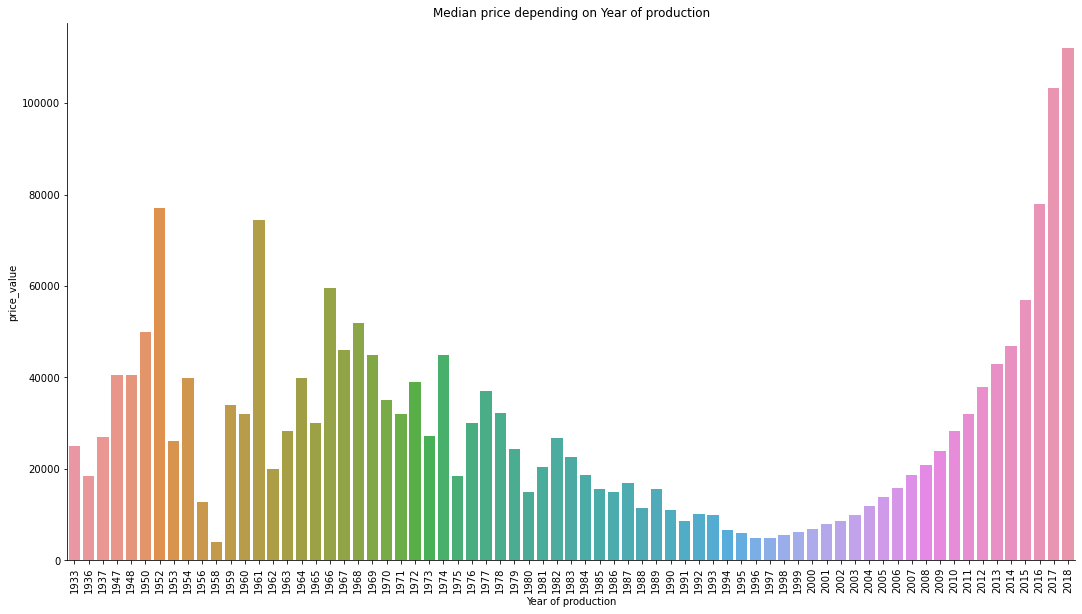

In [25]:
g = df[~df['price_value'].isnull()].groupby('Year_new')['price_value'].agg('median').reset_index()
sns.catplot(x='Year_new', y='price_value', data=g[g['price_value']<200000], kind='bar', height=8, aspect=15/8);
plt.xticks(rotation=90);
plt.title('Median price depending on Year of production');
plt.xlabel('Year of production');

In [51]:
print('There are cars that are marked as vintage car - but they are too young:')
df[(df['Year_new']>1996) & (df['Zarejestrowany jako zabytek']=='Tak')][['Year_new', 'First registration_new', 'brand', 'model', 'version', 'price_value']]
# df['Zarejestrowany jako zabytek'].value_counts()

There are cars that are marked as vintage car - but they are too young:


,Year_new,First registration_new,brand,model,version,price_value
27127,2006,-1,SsangYong,REXTON,NaN,12900.0
81285,2005,31 październik 2005,Alfa Romeo,159,NaN,17800.0
95283,2004,-1,Toyota,Avensis,Toyota Avensis II (2003 - 2009),16200.0
122094,2008,-1,Ford,Mondeo,Ford Mondeo Mk4 (2007-2014),21900.0
142260,2014,06 marzec 2014,Renault,Scenic,Renault Scenic IV (2013-),48900.0
25410,2011,1 listopad 2011,Hyundai,i20,Hyundai i20 I (2008-2014),NaN
40735,2017,31 październik 2017,Peugeot,3008,Peugeot 3008 II (2016-),NaN
45583,2008,13 luty 2009,Mercedes-Benz,Klasa C,Mercedes-Benz Klasa C W204 (2007-2014),NaN
59251,2003,-1,Volvo,S80,Volvo S80 I (1998-2006),NaN
62792,2007,-1,BMW,Seria 5,BMW Seria 5 E60 (2003-2010),NaN


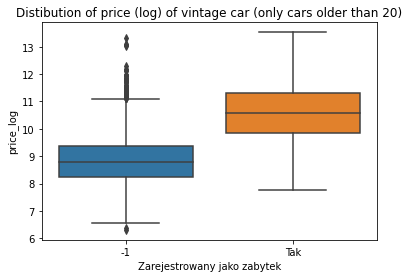

In [52]:
sns.boxplot(x='Zarejestrowany jako zabytek', y='price_log', data=df[df['Year_new']<2000]);
plt.title('Distibution of price (log) of vintage car (only cars older than 20)');

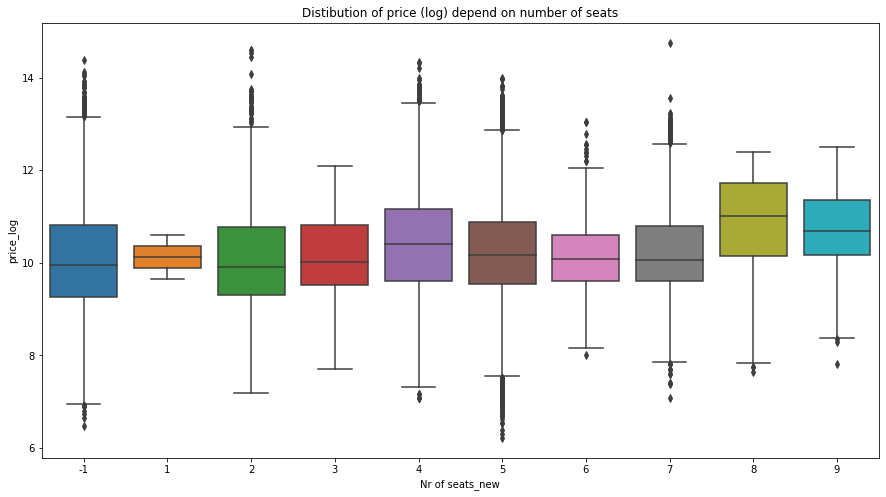

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Nr of seats_new', y='price_log', data=df, order=[-1, '1','2','3','4','5','6','7','8','9']);
plt.title('Distibution of price (log) depend on number of seats');

In [54]:
df['Nr of seats_new'] = df['Nr of seats_new'].astype(int)

In [55]:
df.loc[df['Nr of seats_new']==1, 'Nr of seats_new'] = -1 # these 3 cars don't have just 1 seat. 

In [32]:
# change engine capacity and power to numeric
df['Engine capacity_new'] = df['Engine capacity_new'].map(lambda x: str(x).split('cm3')[0].replace(' ', '')).astype(int)
df['Engine power_new'] = df['Engine power_new'].map(lambda x: str(x).replace('KM', '').replace('HP', '').replace(' ', '')).astype(int)

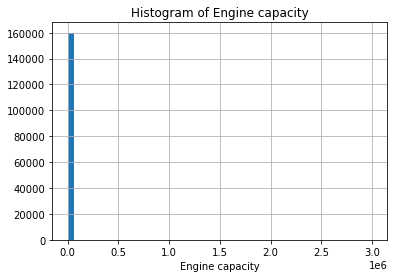

In [34]:
df['Engine capacity_new'].hist(bins=50);
plt.title('Histogram of Engine capacity');
plt.xlabel('Engine capacity');

In [35]:
df['Engine capacity_new'].describe()

count    1.602570e+05
mean     2.204690e+03
std      1.681113e+04
min     -1.000000e+00
25%      1.422000e+03
50%      1.800000e+03
75%      2.000000e+03
max      3.000218e+06
Name: Engine capacity_new, dtype: float64

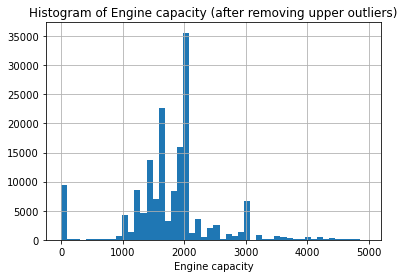

In [36]:
def reset_outlires(df, feat, prc=99):
    cut_value = np.percentile(df[feat], prc)
    
    return df[feat].map(lambda x: x if x < cut_value else -1)

df['Engine capacity_new_prc'] = reset_outlires(df, 'Engine capacity_new')
df['Engine capacity_new_prc'].hist(bins=50);
plt.title('Histogram of Engine capacity (after removing upper outliers)');
plt.xlabel('Engine capacity');

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


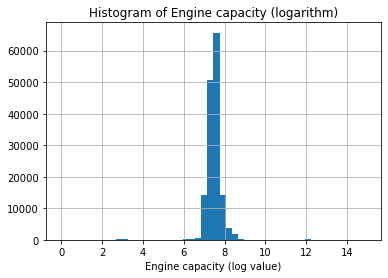

In [37]:
df['Engine capacity_new_log'] = np.log(df['Engine capacity_new'])
df['Engine capacity_new_log'].hist(bins=50);
plt.title('Histogram of Engine capacity (logarithm)');
plt.xlabel('Engine capacity (log value)');

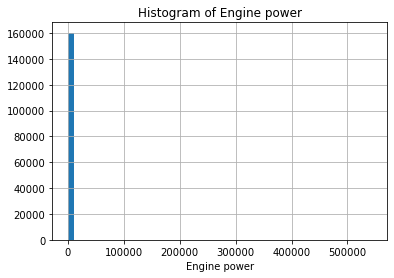

In [38]:
df['Engine power_new'].hist(bins=50);
plt.title('Histogram of Engine power');
plt.xlabel('Engine power');

In [39]:
df['Engine power_new'].describe()

count    160257.000000
mean        146.632490
std        1890.512166
min          -1.000000
25%          93.000000
50%         122.000000
75%         156.000000
max      543848.000000
Name: Engine power_new, dtype: float64

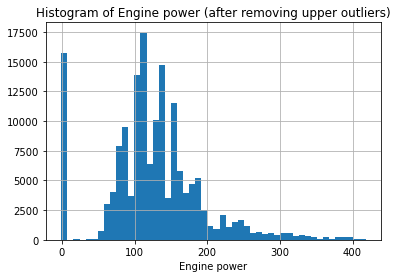

In [40]:
df['Engine power_new_prc'] = reset_outlires(df, 'Engine power_new')
df['Engine power_new_prc'].hist(bins=50);
plt.title('Histogram of Engine power (after removing upper outliers)');
plt.xlabel('Engine power');

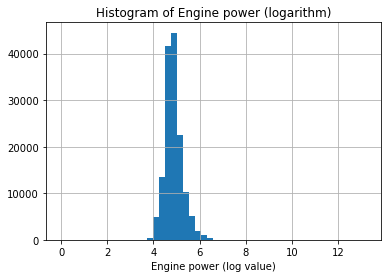

In [41]:
df['Engine power_new_log'] = np.log(df['Engine power_new'])
df['Engine power_new_log'].hist(bins=50);
plt.title('Histogram of Engine power (logarithm)');
plt.xlabel('Engine power (log value)');

In [42]:
def replace_capacity(row):
    if row > 1000000:
        return int(row/1000)
    elif row > 70000:
        return int(row/100)
    elif row > 9000:
        return int(row/10)
    
    return row

def replace_power(row):
    if row > 100000:
        return int(row/1000)
    elif row > 5000:
        return int(row/100)
    
    return row

def swap_engine(row):
    if (row['Engine power_new_rep'] > 800) and (row['Engine power_new_rep'] > row['Engine capacity_new_rep']) and (row['Engine capacity_new_rep'] > 0) and (row['Engine capacity_new_rep'] < 600):
        return pd.Series([row['Engine power_new_rep'], row['Engine capacity_new_rep']])
    return pd.Series([row['Engine capacity_new_rep'], row['Engine power_new_rep']])

def replace_capacity_up(row):
    if row['Engine capacity_new_rep'] < 10 and row['Engine capacity_new_rep'] != -1:
        return row['Engine capacity_new_rep'] * 1000
    elif row['Engine capacity_new_rep'] > 9 and row['Engine capacity_new_rep'] < 40:
        return row['Engine capacity_new_rep'] * 100
    elif (row['Engine capacity_new_rep'] > 39 and row['Engine capacity_new_rep'] < 300) \
    or (row['Engine capacity_new_rep'] > 299 and row['Engine capacity_new_rep'] < 700 and row['Engine power_new_rep'] > 120):
        return row['Engine capacity_new_rep'] * 10
    return row['Engine capacity_new_rep']

def replace_power_up(row):
    if row['Engine power_new_rep'] > 850 :
        return row['Engine power_new_rep'] / 10
    elif row['Engine power_new_rep'] < 70 and row['Engine capacity_new_rep'] > 2000:
        return -1
    return row['Engine power_new_rep']


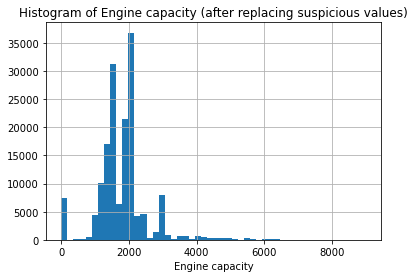

In [43]:
df['Engine capacity_new_rep'] = df['Engine capacity_new'].map(replace_capacity)
df['Engine power_new_rep'] = df['Engine power_new'].map(replace_power)
# swap capacity with power under conditions.
df[['Engine capacity_new_rep', 'Engine power_new_rep']] = df[['Engine capacity_new_rep', 'Engine power_new_rep']].apply(swap_engine, axis=1)
df['Engine capacity_new_rep'] = df[['Engine capacity_new_rep', 'Engine power_new_rep']].apply(replace_capacity_up, axis=1)
df['Engine power_new_rep'] = df[['Engine capacity_new_rep', 'Engine power_new_rep']].apply(replace_power_up, axis=1)

df['Engine capacity_new_rep'].hist(bins=50);
plt.title('Histogram of Engine capacity (after replacing suspicious values)');
plt.xlabel('Engine capacity');

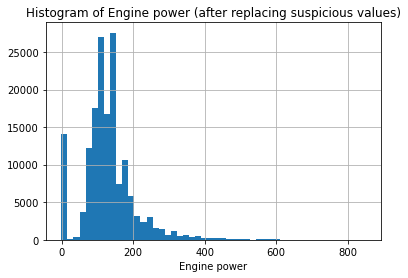

In [44]:

df['Engine power_new_rep'].hist(bins=50);
plt.title('Histogram of Engine power (after replacing suspicious values)');
plt.xlabel('Engine power');

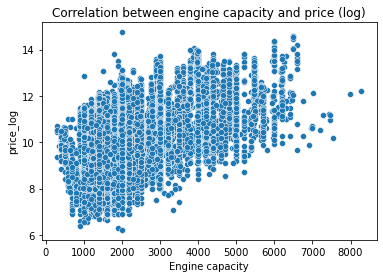

In [69]:
sns.scatterplot(x='Engine capacity_new_rep', y='price_log', data=df[df['Engine capacity_new']!=-1]);
plt.title('Correlation between engine capacity and price (log)');
plt.xlabel('Engine capacity');

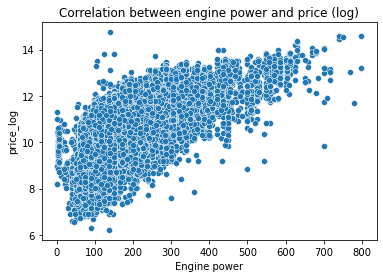

In [70]:
sns.scatterplot(x='Engine power_new_rep', y='price_log', data=df[df['Engine power_new_rep']!=-1]);
plt.title('Correlation between engine power and price (log)');
plt.xlabel('Engine power');

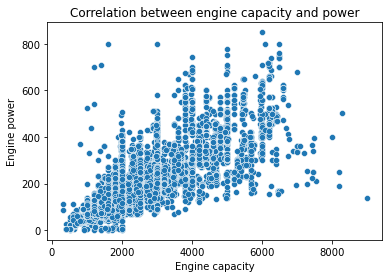

In [71]:
sns.scatterplot(x='Engine capacity_new_rep', y='Engine power_new_rep', data=df[(df['Engine capacity_new_rep']!=-1)&(df['Engine power_new_rep']!=-1)]);
plt.title('Correlation between engine capacity and power');
plt.xlabel('Engine capacity');
plt.ylabel('Engine power');

In [45]:
df['Mileage_new'] = df['Mileage_new'].map(lambda x: str(x).split('km')[0].replace(' ', '')).astype(int)

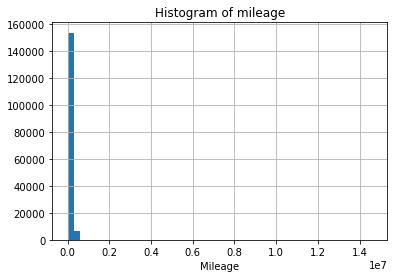

In [46]:
df['Mileage_new'].hist(bins=50);
plt.title('Histogram of mileage');
plt.xlabel('Mileage');

In [47]:
df['Mileage_new'].describe()

count    1.602570e+05
mean     1.441216e+05
std      1.249993e+05
min     -1.000000e+00
25%      6.800000e+04
50%      1.540000e+05
75%      2.050000e+05
max      1.460069e+07
Name: Mileage_new, dtype: float64

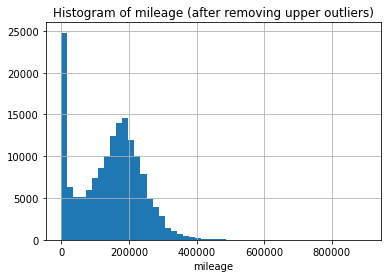

In [48]:
df['Mileage_new_prc'] = reset_outlires(df, 'Mileage_new', prc=99.926)
df['Mileage_new_prc'].hist(bins=50);
plt.title('Histogram of mileage (after removing upper outliers)');
plt.xlabel('mileage');

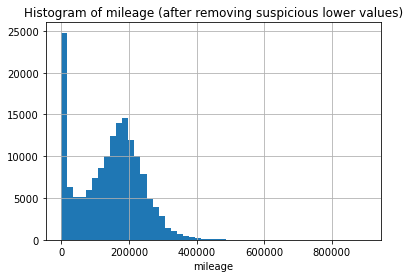

In [49]:
df['Mileage_new_prc'] = df[['Mileage_new_prc', 'Year_new']].apply(lambda x: -1 if x['Mileage_new_prc']<101 and x['Year_new']<2017 else x['Mileage_new_prc'], axis=1)
df['Mileage_new_prc'].hist(bins=50);
plt.title('Histogram of mileage (after removing suspicious lower values)');
plt.xlabel('mileage');

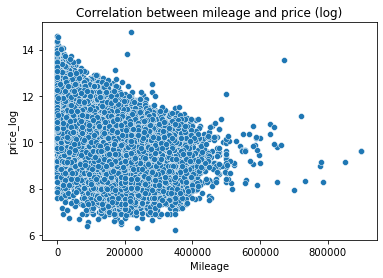

In [77]:
sns.scatterplot(x='Mileage_new_prc', y='price_log', data=df[df['Mileage_new_prc']!=-1]);
plt.title('Correlation between mileage and price (log)');
plt.xlabel('Mileage');

In [50]:
df['Door count_new'].value_counts()

5     107640
4      22884
-1     14626
3      11017
2       3909
6        144
7         18
8          6
9          6
1          6
30         1
Name: Door count_new, dtype: int64

In [51]:
df[df['Door count_new']=='30'][['brand', 'model', 'version']]

,brand,model,version
42070,Suzuki,Swift,Suzuki Swift IV (2004-2010)


In [52]:
df.loc[df['Door count_new']=='30', 'Door count_new'] = 3 # it is unlikely that this Suzuki has 30 doors

Also 1, 7, 8, 9 doors is unlikely -  in some cases it could have been mistaken with number of seats.

In [53]:
df.loc[df['Door count_new']=='1', 'Door count_new'] = -1
df.loc[df['Door count_new']=='7', 'Door count_new'] = -1
df.loc[df['Door count_new']=='8', 'Door count_new'] = -1
df.loc[df['Door count_new']=='9', 'Door count_new'] = -1

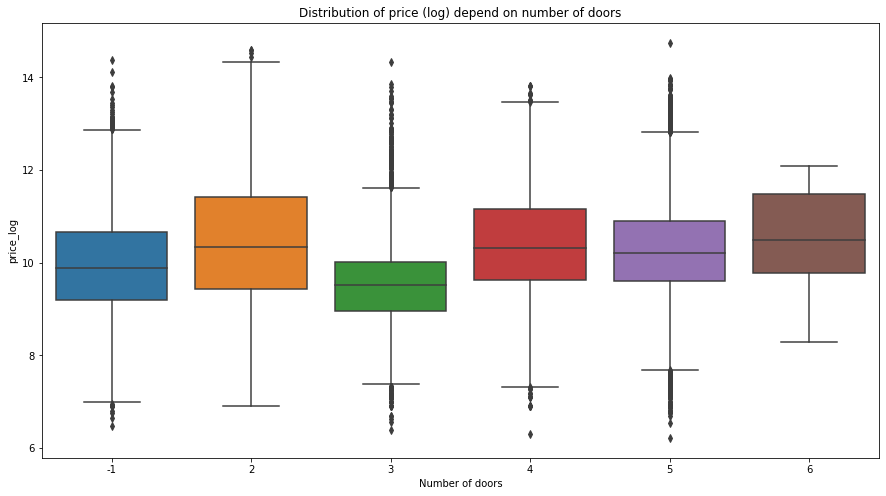

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Door count_new', y='price_log', data=df, order=[-1, '2','3','4','5','6']);
plt.title('Distribution of price (log) depend on number of doors');
plt.xlabel('Number of doors');

In [83]:
df['Door count_new'] = df['Door count_new'].astype(int)

In [55]:
df['First registration_new'] = df['First registration_new'].map(lambda x: str(x).split(' ')[-1]).astype(int)

In [56]:
df['CO2 emissions_new'] = df['CO2 emissions_new'].map(lambda x: str(x).split('g/km')[0].replace(' ', '')).astype(int)

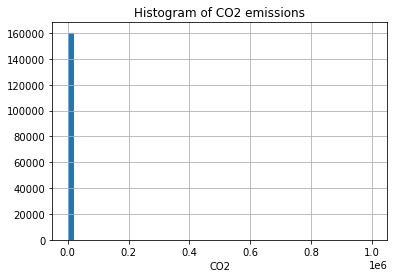

In [57]:
df['CO2 emissions_new'].hist(bins=50);
plt.title('Histogram of CO2 emissions');
plt.xlabel('CO2');

In [58]:
df[df['CO2 emissions_new']!=-1]['CO2 emissions_new'].describe()

count       3101.000000
mean         450.544018
std        17969.823594
min            1.000000
25%           98.000000
50%          124.000000
75%          144.000000
max      1000000.000000
Name: CO2 emissions_new, dtype: float64

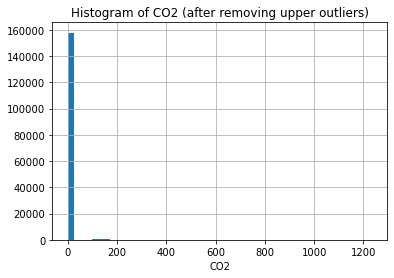

In [59]:
df['CO2 emissions_new_prc'] = reset_outlires(df, 'CO2 emissions_new', 99.997)
df['CO2 emissions_new_prc'].hist(bins=50);
plt.title('Histogram of CO2 (after removing upper outliers)');
plt.xlabel('CO2');

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


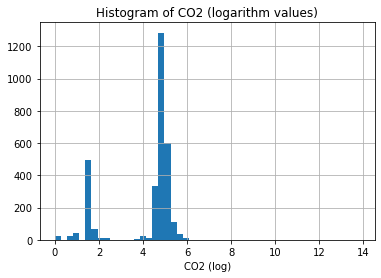

In [60]:
df['CO2 emissions_new_log'] = np.log(df['CO2 emissions_new'])
df['CO2 emissions_new_log'].hist(bins=50);
plt.title('Histogram of CO2 (logarithm values)');
plt.xlabel('CO2 (log)');

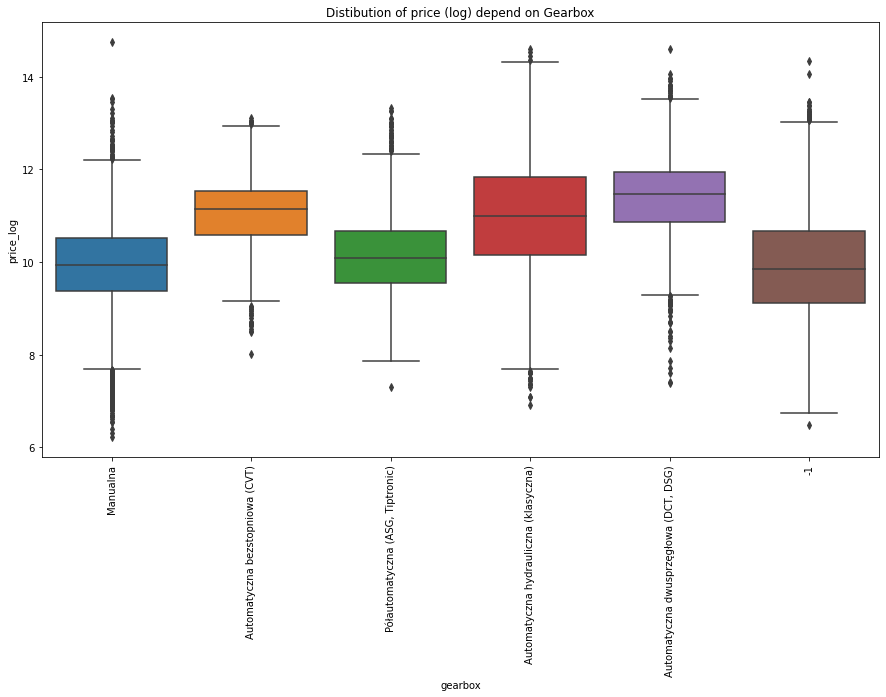

In [61]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Gearbox_new', y='price_log', data=df );
plt.xticks(rotation=90);
plt.title('Distibution of price (log) depend on Gearbox');
plt.xlabel('gearbox');

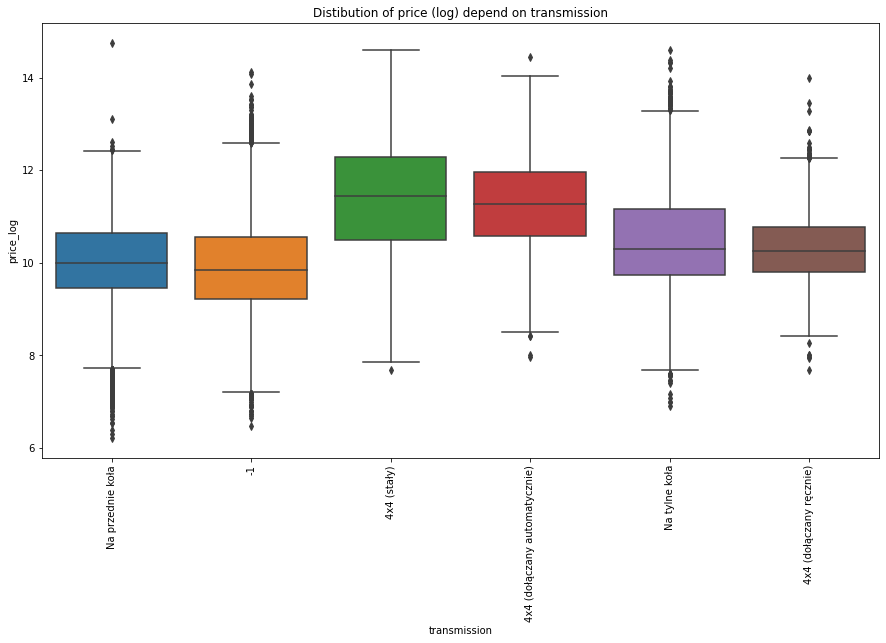

In [62]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Transmission_new', y='price_log', data=df );
plt.xticks(rotation=90);
plt.title('Distibution of price (log) depend on transmission');
plt.xlabel('transmission');

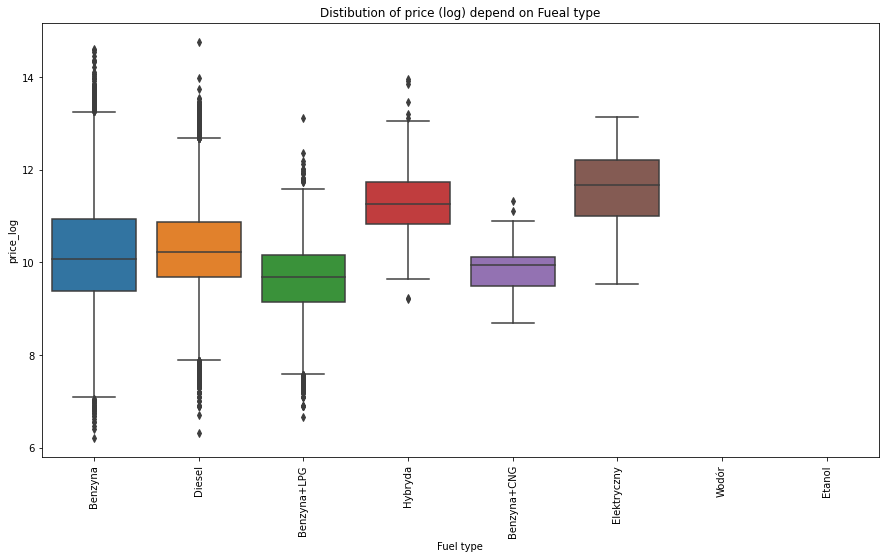

In [63]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Fuel type_new', y='price_log', data=df );
plt.xticks(rotation=90);
plt.title('Distibution of price (log) depend on Fueal type');
plt.xlabel('Fuel type');

In [70]:
df[~df['price_value'].isnull()].groupby(['Gearbox_new', 'Transmission_new', 'Fuel type_new'])['price_value'].median().sort_values(ascending=False).head(20)

Gearbox_new                            Transmission_new               Fuel type_new
Manualna                               4x4 (dołączany automatycznie)  Hybryda          694977.0
Automatyczna bezstopniowa (CVT)        4x4 (stały)                    Elektryczny      427000.0
-1                                     4x4 (stały)                    Elektryczny      403600.0
Automatyczna hydrauliczna (klasyczna)  4x4 (stały)                    Elektryczny      294450.0
Automatyczna dwusprzęgłowa (DCT, DSG)  4x4 (dołączany automatycznie)  Hybryda          216900.0
                                       4x4 (stały)                    Benzyna          179997.0
Automatyczna hydrauliczna (klasyczna)  Na tylne koła                  Hybryda          171000.0
                                                                      Elektryczny      169900.0
Automatyczna dwusprzęgłowa (DCT, DSG)  4x4 (stały)                    Diesel           161050.0
                                       Na tylne koła

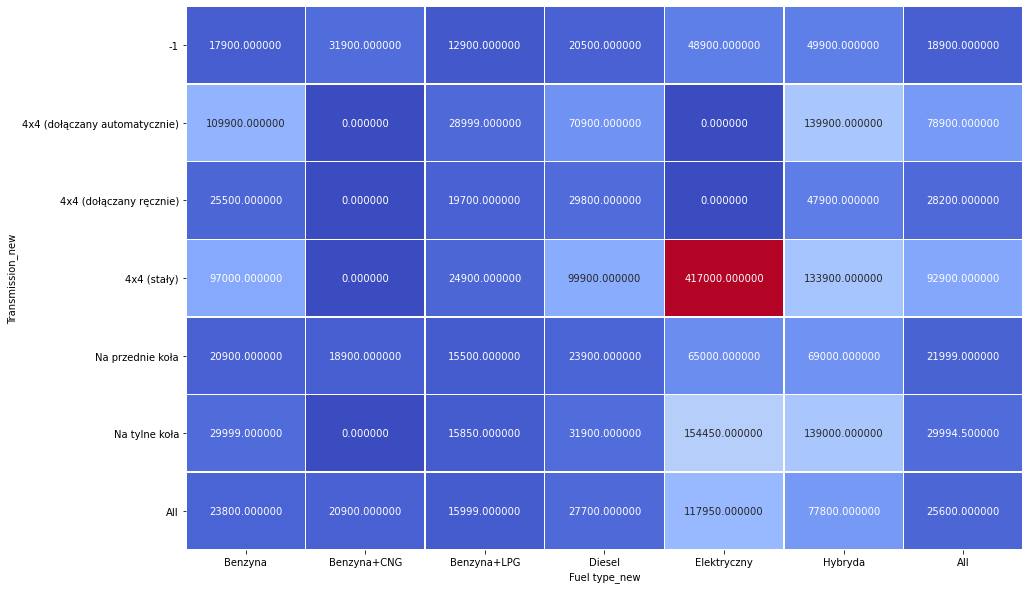

In [82]:
pt= df.pivot_table(values='price_value', index='Transmission_new',columns='Fuel type_new', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

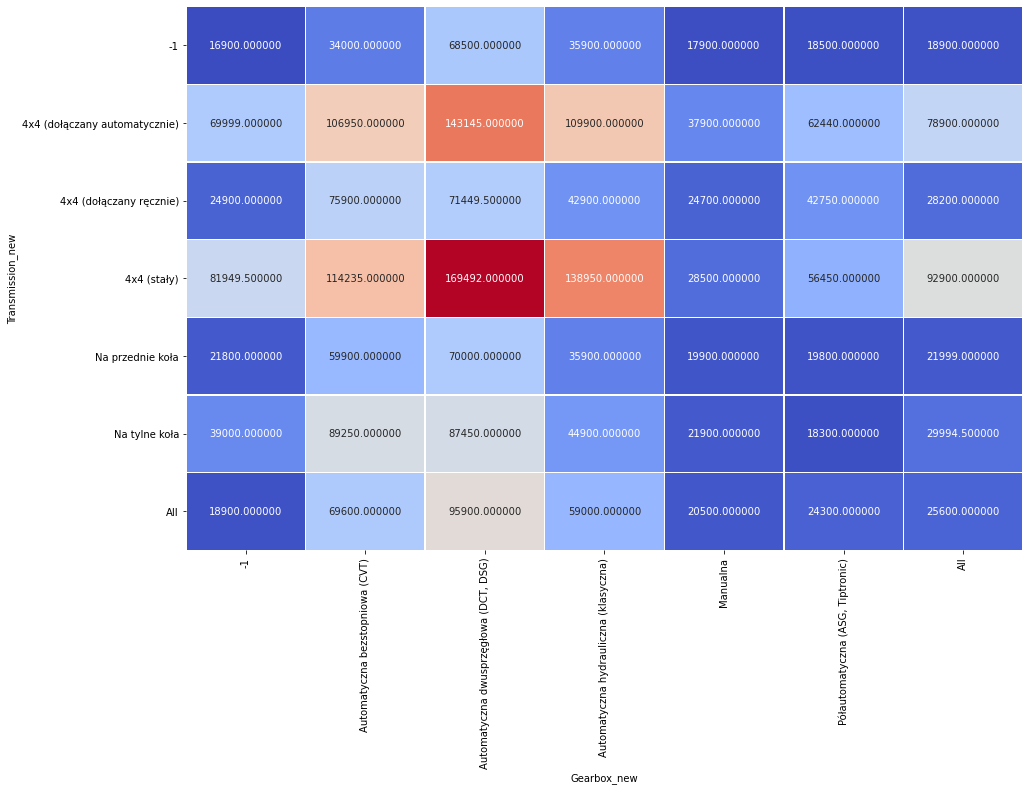

In [83]:
pt= df.pivot_table(values='price_value', index='Transmission_new',columns='Gearbox_new', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

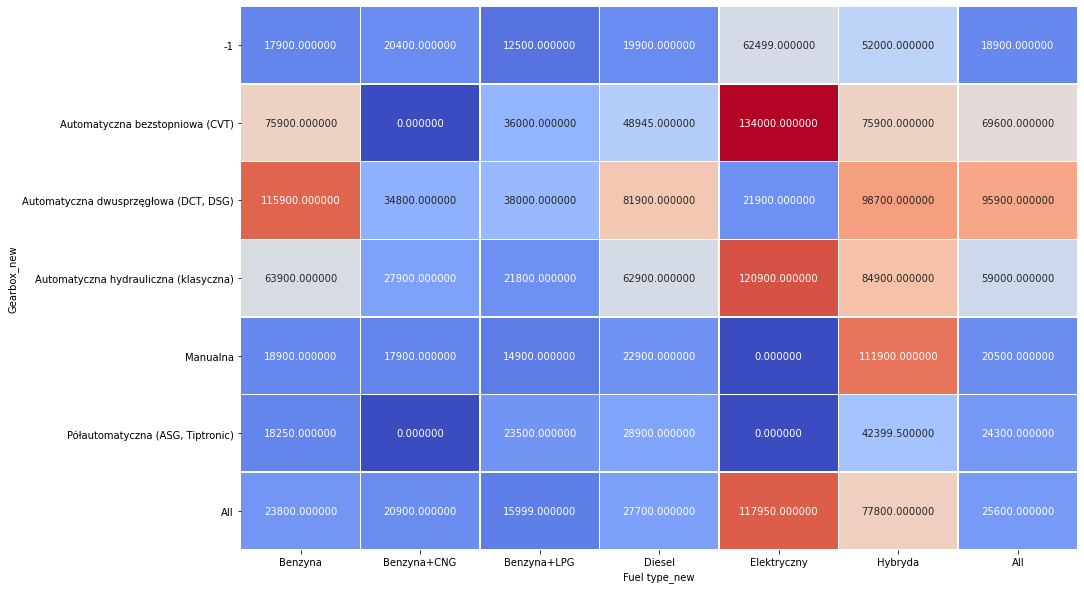

In [84]:
pt= df.pivot_table(values='price_value', index='Gearbox_new',columns='Fuel type_new', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

In [85]:
pd.crosstab(df['Gearbox_new'], df['Fuel type_new'])

Fuel type_new,Benzyna,Benzyna+CNG,Benzyna+LPG,Diesel,Elektryczny,Etanol,Hybryda,Wodór
Gearbox_new,,,,,,,,
-1,3654,8,578,4231,25,0,43,1
Automatyczna bezstopniowa (CVT),888,1,72,713,65,0,559,0
"Automatyczna dwusprzęgłowa (DCT, DSG)",3653,6,43,5860,2,0,72,0
Automatyczna hydrauliczna (klasyczna),10823,9,1360,15492,28,0,262,0
Manualna,51143,78,5060,54212,0,1,16,0
"Półautomatyczna (ASG, Tiptronic)",501,0,70,720,0,0,8,0


In [71]:
df['No accident_new'].value_counts()

Tak    100707
-1      59550
Name: No accident_new, dtype: int64

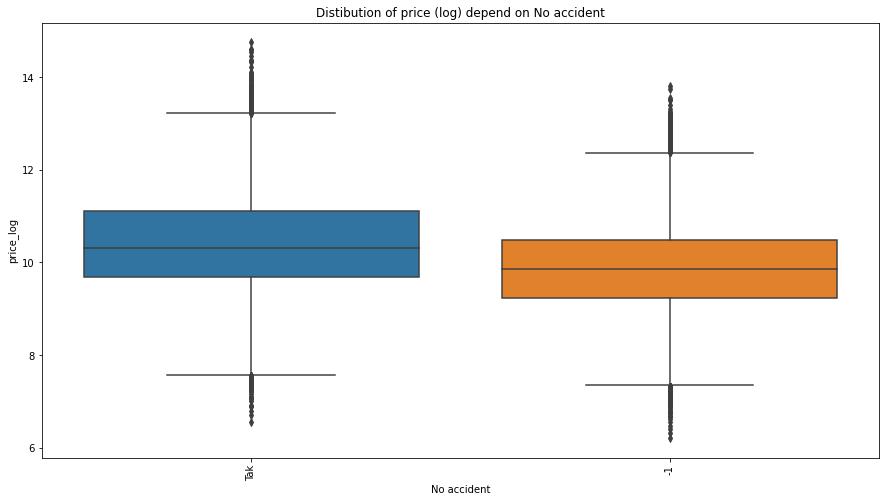

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(x='No accident_new', y='price_log', data=df );
plt.xticks(rotation=90);
plt.title('Distibution of price (log) depend on No accident');
plt.xlabel('No accident');

In [86]:
pd.crosstab(df['No accident_new'], df['Damaged_new'])

Damaged_new,-1,Tak
No accident_new,,
-1,53589,5961
Tak,100373,334


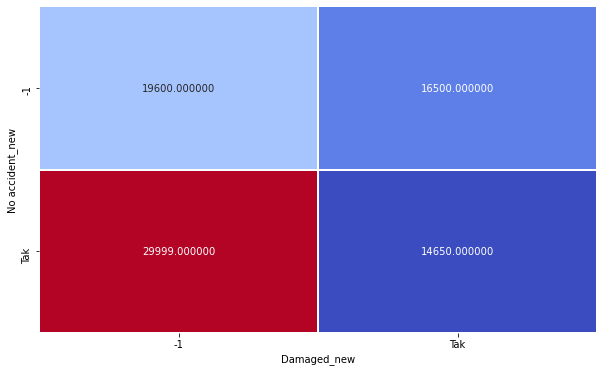

In [88]:
pt= df.pivot_table(values='price_value', index='No accident_new',columns='Damaged_new', aggfunc=np.median, fill_value=0, margins=False)
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(pt, annot=True, fmt="f", cmap="coolwarm", cbar=False, linewidths=.5);

In [91]:
obj_feats = df.select_dtypes(object).columns

for feat in obj_feats:
    some_value = df[feat].values[0]
    if isinstance(some_value, list): continue
    if isinstance(some_value, dict): continue
    if 'price' in feat or 'price_log' in feat: continue

    df['{}_cat'.format(feat)] = df[feat].factorize()[0] # change object to numeric type
    

In [92]:
feats = df.select_dtypes('int64').columns

In [93]:
print('TOP 20 features most correlated with price:')
df[feats].corrwith(df['price_value']).abs().sort_values(ascending=False).head(20)

TOP 20 features most correlated with price:


nr_expensive_feats              0.544874
Mileage_new_prc                 0.476305
Faktura VAT_cat                 0.443067
kamera cofania                  0.430434
Stan_cat                        0.406774
światła led                     0.402216
łopatki zmiany biegów           0.397474
system start-stop               0.384925
czujniki parkowania przednie    0.366474
Gearbox_new_cat                 0.356421
asystent pasa ruchu             0.350966
Mileage_new                     0.341617
bluetooth                       0.335614
nawigacja gps                   0.331712
Engine capacity_new_rep         0.323244
czujnik martwego pola           0.319914
światła do jazdy dziennej       0.304985
gniazdo usb                     0.302993
Engine power_new_prc            0.302468
nr_of_features                  0.300083
dtype: float64